# Разведочный анализ данных (EDA) датасета Т-Инвестиции

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv('invest_db.csv', sep = ';')
df

,id,date,age,education_level_cd,marital_status_cd,children_cnt,monthly_income_amt,invest_utilization_dt,forts_flg,margin_status_flg,...,portf_fnd_amt,portf_opt_amt,portf_ore_amt,ccr_balance_amt,cor_balance_amt,lon_balance_amt,posts,comments,reacts,reads
0,1479787897,2024-04-20,33,NaN,UNM,"0,0","31272,0",2023-09-13,1,0,...,"428,0","0,0","0,0","-11298,0","541,0","0,0","0,0","0,0","0,0","0,0"
1,601760063,2024-02-01,29,GRD,UNM,"0,0","6284,0",2021-03-29,0,0,...,"23,0","0,0","0,0",NaN,"8115,0","0,0","0,0","0,0","0,0","0,0"
2,61175329,2024-02-10,38,SCH,MAR,"0,0","1904,0",2023-12-05,1,0,...,"193,0","0,0","0,0","0,0","25,0",NaN,"0,0","0,0","0,0","2,0"
3,1411700618,2024-03-05,64,NaN,NaN,"0,0",NaN,2021-09-16,0,0,...,"0,0","0,0","0,0",NaN,"65,0",NaN,"0,0","0,0","0,0","0,0"
4,2096755145,2024-02-10,31,NaN,UNM,"0,0",NaN,2022-03-01,0,0,...,"0,0","0,0","0,0","0,0","0,0",NaN,"0,0","0,0","0,0","0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458365,324374950,2024-04-29,28,NaN,NaN,"0,0",NaN,2021-04-23,1,0,...,"148,0","0,0","0,0",NaN,"310,0",NaN,"0,0","0,0","0,0","21,0"
458366,1903825748,2024-02-19,46,NaN,NaN,"0,0","2524,0",2020-12-10,1,0,...,"429,0","0,0","0,0","0,0","5068,0",NaN,"0,0","0,0","0,0","6,0"
458367,1825570440,2024-03-21,49,GRD,MAR,"0,0","6267,0",2021-03-11,1,1,...,"467,0","0,0","0,0","0,0","280,0",NaN,"0,0","0,0","0,0","7,0"
458368,744042474,2024-02-13,34,GRD,MAR,"1,0","4713,0",2020-05-22,1,1,...,"0,0","0,0","0,0","-194237,0","537,0","-34401,0","0,0","0,0","0,0","0,0"


Датасет содержит 458370 записей и 51 столбец. Абсолютное большинство переменных - количественные, но много пустых значений, а также неверный формат (вместо точки - запятая), из-за чего у большинства числовых колонок object

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458370 entries, 0 to 458369
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        458370 non-null  int64 
 1   date                      458370 non-null  object
 2   age                       458370 non-null  int64 
 3   education_level_cd        233460 non-null  object
 4   marital_status_cd         267030 non-null  object
 5   children_cnt              410310 non-null  object
 6   monthly_income_amt        355140 non-null  object
 7   invest_utilization_dt     458370 non-null  object
 8   forts_flg                 458370 non-null  int64 
 9   margin_status_flg         458370 non-null  int64 
 10  qualified_investor_flg    458370 non-null  int64 
 11  in_payment_rub_amt        458370 non-null  object
 12  out_payment_rub_amt       458370 non-null  object
 13  uncovered_position_amt    458370 non-null  object
 14  turn

Определим иные параметры датасета, например, количество уникальных инвесторов (5093), а также период, за который приведены данные в датасете.

In [4]:
df = df.fillna(0)
df['id'].nunique() 

5093

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
df['invest_utilization_dt'] = pd.to_datetime(df['invest_utilization_dt'], format='%Y-%m-%d', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458370 entries, 0 to 458369
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        458370 non-null  int64         
 1   date                      458370 non-null  datetime64[ns]
 2   age                       458370 non-null  int64         
 3   education_level_cd        458370 non-null  object        
 4   marital_status_cd         458370 non-null  object        
 5   children_cnt              458370 non-null  object        
 6   monthly_income_amt        458370 non-null  object        
 7   invest_utilization_dt     458370 non-null  datetime64[ns]
 8   forts_flg                 458370 non-null  int64         
 9   margin_status_flg         458370 non-null  int64         
 10  qualified_investor_flg    458370 non-null  int64         
 11  in_payment_rub_amt        458370 non-null  object        
 12  ou

In [6]:
df = df.sort_values(by='date') 
df['date'] #период: 01.02.2024-30.04.2024

381130   2024-02-01
160119   2024-02-01
219174   2024-02-01
219171   2024-02-01
140670   2024-02-01
            ...    
118258   2024-04-30
397055   2024-04-30
203473   2024-04-30
241315   2024-04-30
292546   2024-04-30
Name: date, Length: 458370, dtype: datetime64[ns]

### Статистический анализ

In [7]:
df.describe()

,id,date,age,invest_utilization_dt,forts_flg,margin_status_flg,qualified_investor_flg
count,4.583700e+05,458370,458370.000000,458370,458370.000000,458370.000000,458370.000000
mean,1.062470e+09,2024-03-16 11:59:59.999999744,40.533674,2021-10-24 13:53:14.266639872,0.530006,0.322597,0.286797
min,4.239000e+04,2024-02-01 00:00:00,18.000000,2018-04-27 00:00:00,0.000000,0.000000,0.000000
25%,5.234677e+08,2024-02-23 00:00:00,33.000000,2020-10-08 00:00:00,0.000000,0.000000,0.000000
50%,1.053416e+09,2024-03-16 12:00:00,40.000000,2021-10-25 00:00:00,1.000000,0.000000,0.000000
75%,1.613187e+09,2024-04-08 00:00:00,47.000000,2023-03-06 00:00:00,1.000000,1.000000,1.000000
max,2.147203e+09,2024-04-30 00:00:00,86.000000,2024-02-01 00:00:00,1.000000,1.000000,1.000000
std,6.192610e+08,NaN,10.917544,NaN,0.499099,0.467471,0.452266


Заметим, что числовые данные в датасете представлены через ',', поэтому тип данных выглядит как object, а не float. Поэтому необходимо перед анализом данных провести предобработку (заменить ',' на '.')

In [8]:
object_columns = df.select_dtypes(include=['object']).columns

def needs_replacement(column):
    try:
        pd.to_numeric(df[column], errors='raise')
        return False 
    except ValueError:
        return df[column].astype(str).str.contains(',').any()

columns_to_replace = [col for col in object_columns if needs_replacement(col)]

for column in columns_to_replace:
    df[column] = df[column].str.replace(',', '.')
    df[column] = pd.to_numeric(df[column], errors='coerce') 

df.describe()

,id,date,age,children_cnt,monthly_income_amt,invest_utilization_dt,forts_flg,margin_status_flg,qualified_investor_flg,in_payment_rub_amt,...,portf_fnd_amt,portf_opt_amt,portf_ore_amt,ccr_balance_amt,cor_balance_amt,lon_balance_amt,posts,comments,reacts,reads
count,4.583700e+05,458370,458370.000000,410310.000000,355140.000000,458370,458370.000000,458370.000000,458370.000000,4.583700e+05,...,4.583700e+05,458370.000000,4.583700e+05,2.913420e+05,4.573080e+05,1.485030e+05,439050.000000,439050.000000,439050.000000,439050.000000
mean,1.062470e+09,2024-03-16 11:59:59.999999744,40.533674,0.071507,4511.029242,2021-10-24 13:53:14.266639872,0.530006,0.322597,0.286797,2.347745e+02,...,1.199558e+03,11.318633,9.207060e+02,-4.789691e+04,1.140651e+04,-1.631091e+05,0.018244,0.112065,0.246213,4.253577
min,4.239000e+04,2024-02-01 00:00:00,18.000000,0.000000,0.000000,2018-04-27 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,...,-5.879424e+06,-23461.000000,0.000000e+00,-1.098329e+06,-6.704040e+05,-1.483901e+07,0.000000,0.000000,0.000000,0.000000
25%,5.234677e+08,2024-02-23 00:00:00,33.000000,0.000000,1722.000000,2020-10-08 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,-5.229000e+04,2.200000e+01,-3.522100e+04,0.000000,0.000000,0.000000,0.000000
50%,1.053416e+09,2024-03-16 12:00:00,40.000000,0.000000,3143.000000,2021-10-25 00:00:00,1.000000,0.000000,0.000000,0.000000e+00,...,3.700000e+01,0.000000,0.000000e+00,0.000000e+00,4.630000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.613187e+09,2024-04-08 00:00:00,47.000000,0.000000,5025.000000,2023-03-06 00:00:00,1.000000,1.000000,1.000000,0.000000e+00,...,3.730000e+02,0.000000,0.000000e+00,0.000000e+00,6.028000e+03,0.000000e+00,0.000000,0.000000,0.000000,1.000000
max,2.147203e+09,2024-04-30 00:00:00,86.000000,5.000000,156294.000000,2024-02-01 00:00:00,1.000000,1.000000,1.000000,1.934399e+06,...,5.185950e+05,27402.000000,1.107541e+06,3.079100e+04,2.956881e+06,2.910000e+02,34.000000,264.000000,710.000000,1089.000000
std,6.192610e+08,NaN,10.917544,0.353806,6157.620522,NaN,0.499099,0.467471,0.452266,5.938802e+03,...,4.281424e+04,200.454761,8.754344e+03,9.786048e+04,6.771688e+04,7.205143e+05,0.328802,2.219424,4.442220,18.290097


Произведём очистку данных от "неадекватных" значений (например, в некоторых строках непокрытая позиция больше нуля, это выброс).

In [9]:
df = df.loc[df['uncovered_position_amt'] <= 0]
df.describe()

,id,date,age,children_cnt,monthly_income_amt,invest_utilization_dt,forts_flg,margin_status_flg,qualified_investor_flg,in_payment_rub_amt,...,portf_fnd_amt,portf_opt_amt,portf_ore_amt,ccr_balance_amt,cor_balance_amt,lon_balance_amt,posts,comments,reacts,reads
count,4.574870e+05,457487,457487.000000,409462.000000,354381.000000,457487,457487.000000,457487.000000,457487.000000,4.574870e+05,...,4.574870e+05,457487.000000,4.574870e+05,2.907200e+05,4.564250e+05,1.482690e+05,438198.000000,438198.000000,438198.000000,438198.000000
mean,1.062347e+09,2024-03-16 11:53:57.109688064,40.531099,0.071513,4509.665592,2021-10-24 10:12:42.875447808,0.529440,0.321791,0.286736,2.348360e+02,...,1.193297e+03,11.312206,9.213784e+02,-4.789379e+04,1.142088e+04,-1.631149e+05,0.018142,0.111418,0.246138,4.249396
min,4.239000e+04,2024-02-01 00:00:00,18.000000,0.000000,0.000000,2018-04-27 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,...,-5.879424e+06,-23461.000000,0.000000e+00,-1.098329e+06,-6.704040e+05,-1.483901e+07,0.000000,0.000000,0.000000,0.000000
25%,5.234677e+08,2024-02-23 00:00:00,33.000000,0.000000,1732.000000,2020-10-08 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,-5.232900e+04,2.200000e+01,-3.517500e+04,0.000000,0.000000,0.000000,0.000000
50%,1.053230e+09,2024-03-17 00:00:00,40.000000,0.000000,3143.000000,2021-10-22 00:00:00,1.000000,0.000000,0.000000,0.000000e+00,...,3.700000e+01,0.000000,0.000000e+00,0.000000e+00,4.640000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.613187e+09,2024-04-08 00:00:00,47.000000,0.000000,5025.000000,2023-03-06 00:00:00,1.000000,1.000000,1.000000,0.000000e+00,...,3.740000e+02,0.000000,0.000000e+00,0.000000e+00,6.037000e+03,0.000000e+00,0.000000,0.000000,0.000000,1.000000
max,2.147203e+09,2024-04-30 00:00:00,86.000000,5.000000,156294.000000,2024-02-01 00:00:00,1.000000,1.000000,1.000000,1.934399e+06,...,5.185950e+05,27402.000000,1.107541e+06,3.079100e+04,2.956881e+06,2.910000e+02,34.000000,264.000000,710.000000,1089.000000
std,6.192187e+08,NaN,10.911613,0.353951,6144.906423,NaN,0.499133,0.467164,0.452238,5.944222e+03,...,4.284593e+04,200.590057,8.761564e+03,9.785103e+04,6.777729e+04,7.209615e+05,0.327996,2.214553,4.444881,18.253652


Заметим также, что мы имеем дело с множеством булевых переменных в датасете и было бы также полезным избавиться от наблюдений вроде "выключен срочный рынок, но торгует фьючами" и т.п.

In [10]:
df = df.fillna(0)
condition = ~((df['forts_flg'] == 0) & ((df['trade_order_forts_cnt'] > 0) | (df['trade_order_opt_cnt'] > 0)))
df = df[condition]
df

,id,date,age,education_level_cd,marital_status_cd,children_cnt,monthly_income_amt,invest_utilization_dt,forts_flg,margin_status_flg,...,portf_fnd_amt,portf_opt_amt,portf_ore_amt,ccr_balance_amt,cor_balance_amt,lon_balance_amt,posts,comments,reacts,reads
381130,849233533,2024-02-01,32,0,0,0.0,6273.0,2018-08-03,0,0,...,129.0,0.0,0.0,0.0,138.0,0.0,0.0,0.0,0.0,0.0
160119,1920789639,2024-02-01,38,0,0,0.0,5023.0,2020-11-06,0,0,...,0.0,0.0,0.0,-101931.0,2935.0,0.0,0.0,0.0,0.0,0.0
219174,935203400,2024-02-01,38,0,0,0.0,0.0,2021-06-18,1,1,...,164.0,0.0,0.0,0.0,928.0,0.0,0.0,0.0,0.0,3.0
219171,1805259374,2024-02-01,26,SCH,UNM,0.0,2208.0,2021-04-29,1,1,...,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,11.0
140670,1864959442,2024-02-01,34,UGR,0,0.0,1007.0,2021-03-03,1,1,...,198.0,0.0,0.0,0.0,608.0,0.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118258,875601163,2024-04-30,55,0,CIV,0.0,629.0,2023-12-13,0,0,...,61.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
397055,329694823,2024-04-30,46,0,0,0.0,0.0,2023-08-28,0,0,...,0.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0
203473,1631260548,2024-04-30,36,0,DIV,0.0,2544.0,2023-11-03,0,1,...,39.0,0.0,0.0,0.0,3781.0,0.0,0.0,2.0,8.0,72.0
241315,242127900,2024-04-30,21,0,0,0.0,2514.0,2021-11-03,1,1,...,0.0,0.0,0.0,-94000.0,4761.0,0.0,0.0,0.0,0.0,42.0


### Распределения и гистограммы

Рассмотрим количественные данные

In [11]:
df_float64 = df.select_dtypes(include = "float64")
df_float64.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457486 entries, 381130 to 292546
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   children_cnt              457486 non-null  float64
 1   monthly_income_amt        457486 non-null  float64
 2   in_payment_rub_amt        457486 non-null  float64
 3   out_payment_rub_amt       457486 non-null  float64
 4   uncovered_position_amt    457486 non-null  float64
 5   turnover_rus_bon_amt      457486 non-null  float64
 6   turnover_rus_sec_amt      457486 non-null  float64
 7   turnover_forts_amt        457486 non-null  float64
 8   turnover_cur_amt          457486 non-null  float64
 9   turnover_etf_amt          457486 non-null  float64
 10  turnover_fnd_amt          457486 non-null  float64
 11  turnover_opt_amt          457486 non-null  float64
 12  turnover_ore_prc_amt      457486 non-null  float64
 13  turnover_ore_sel_amt      457486 non-null  f

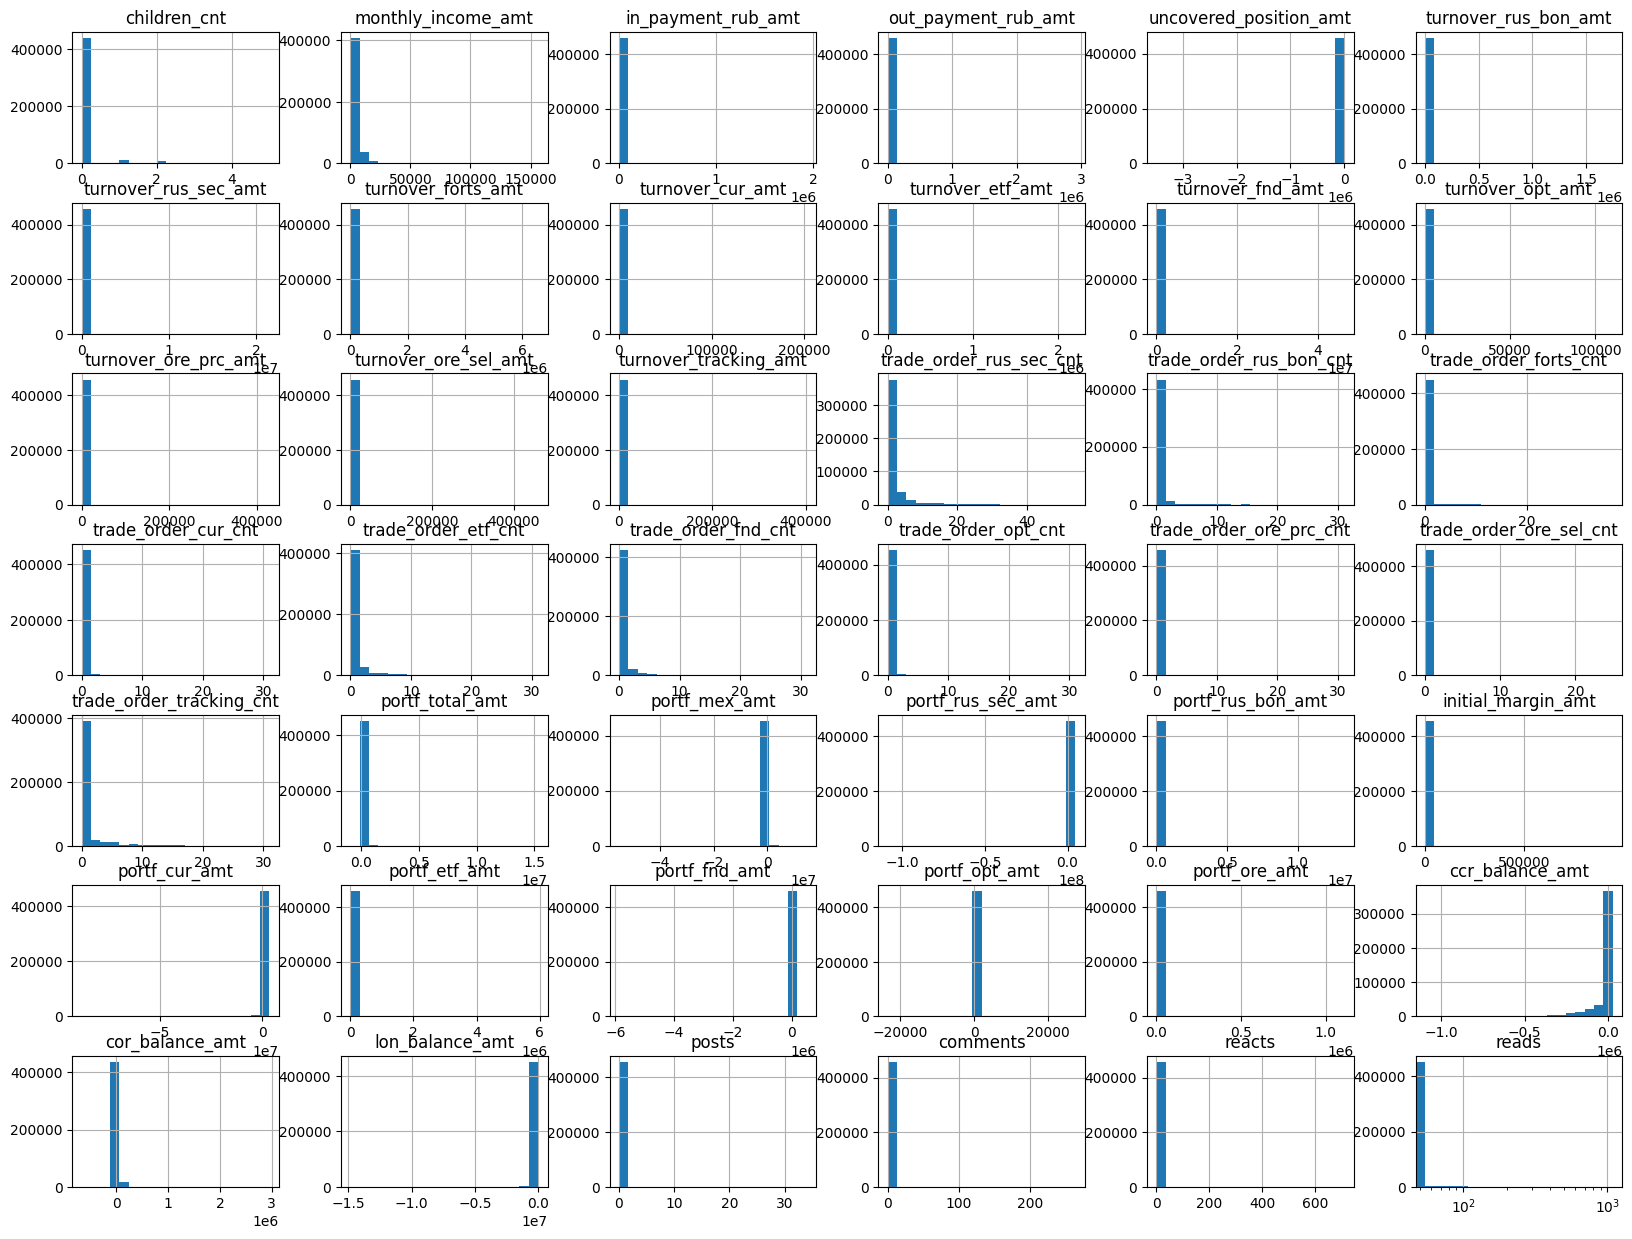

In [12]:
df_float64.hist(bins=20, figsize=(20, 15))
plt.xscale('log')
plt.show()

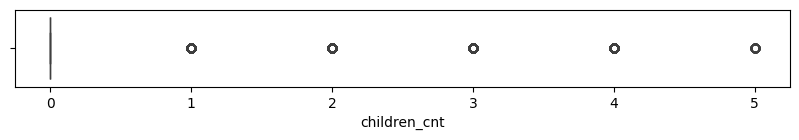

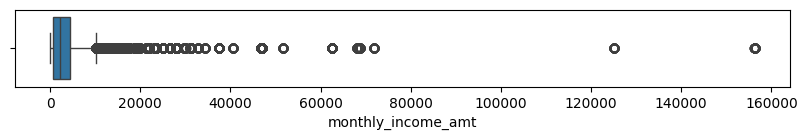

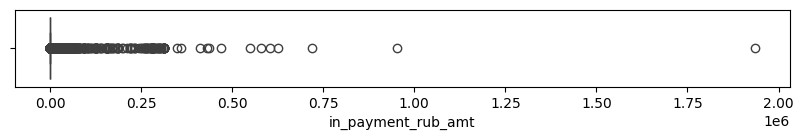

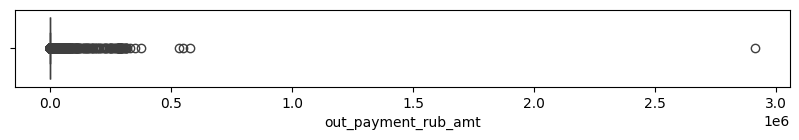

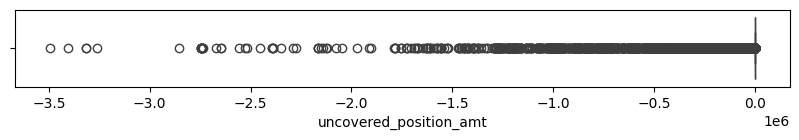

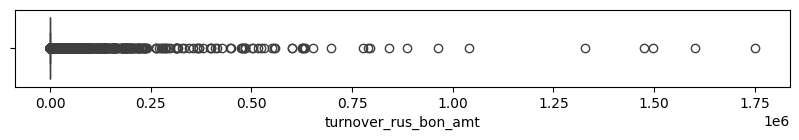

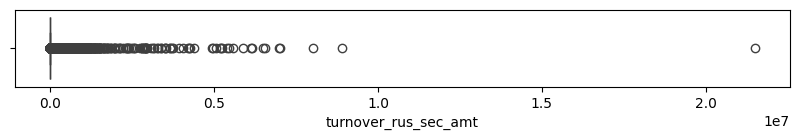

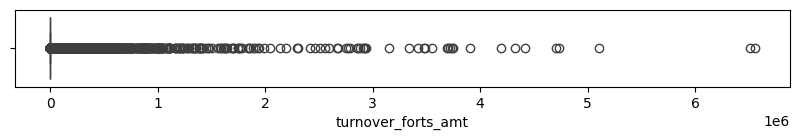

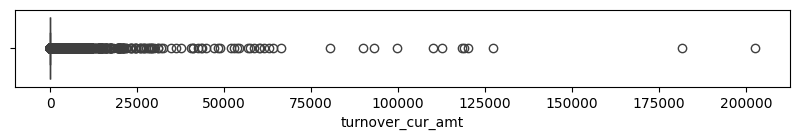

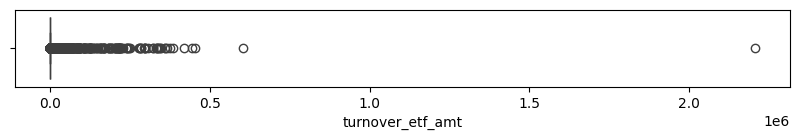

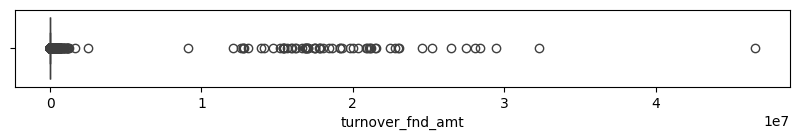

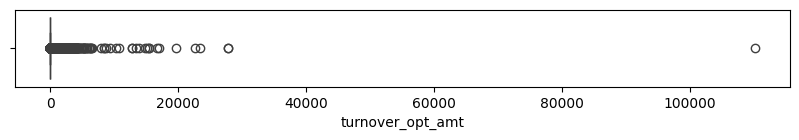

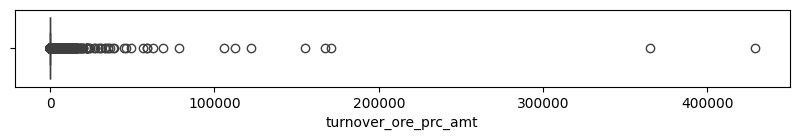

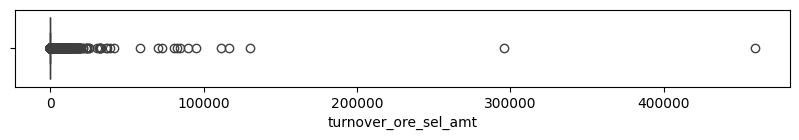

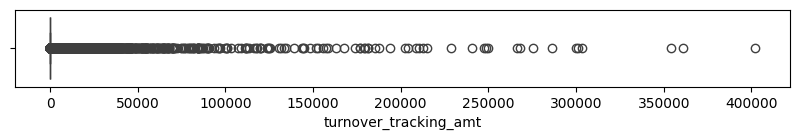

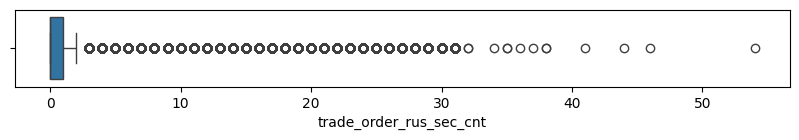

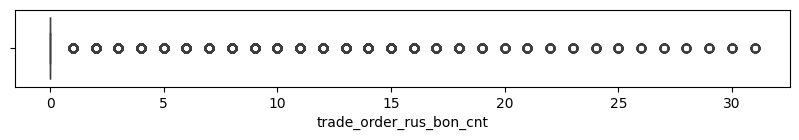

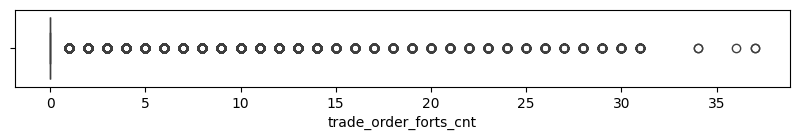

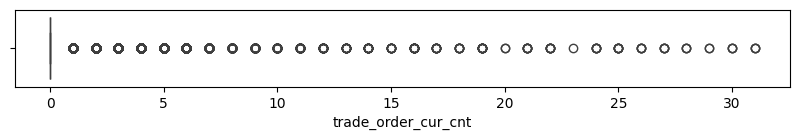

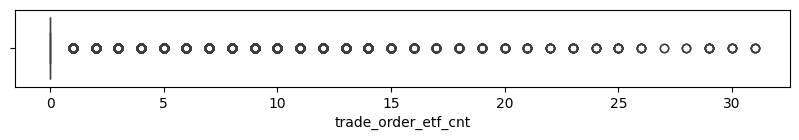

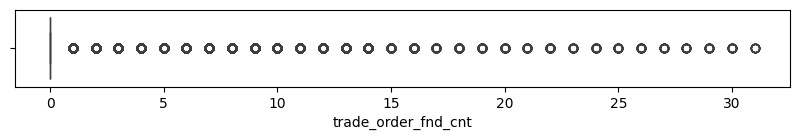

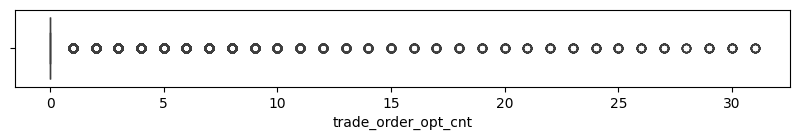

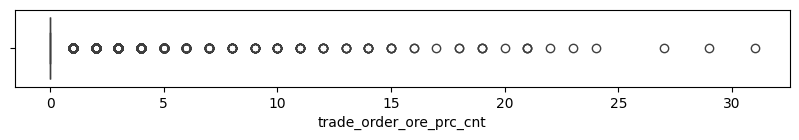

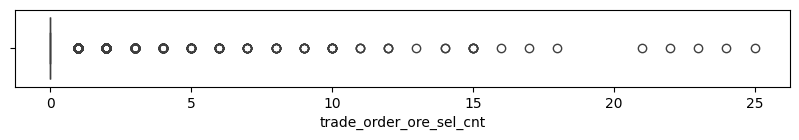

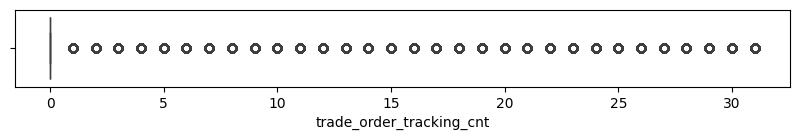

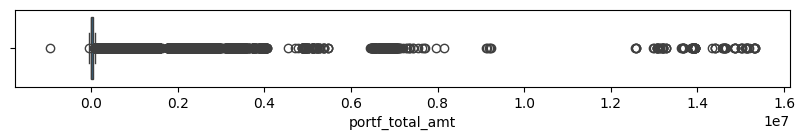

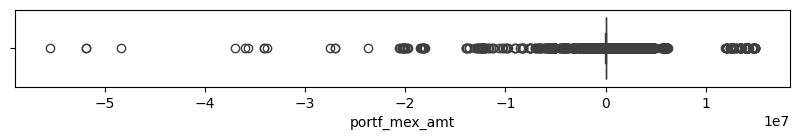

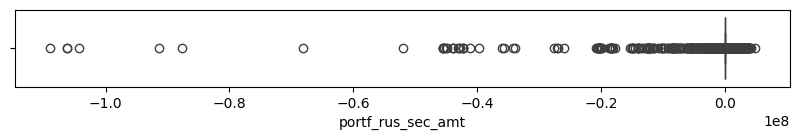

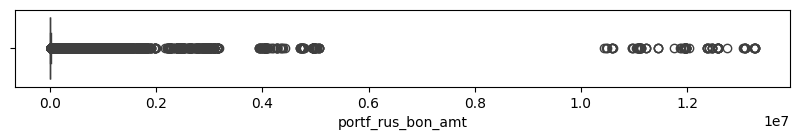

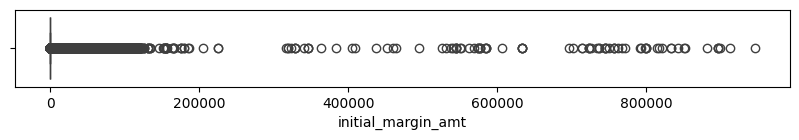

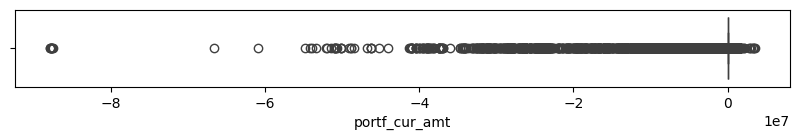

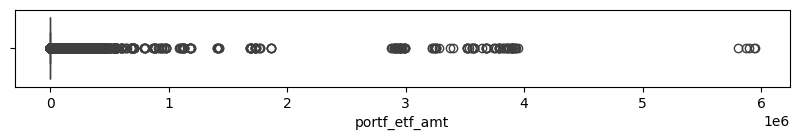

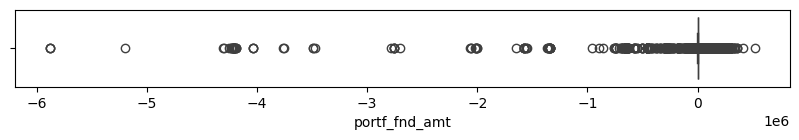

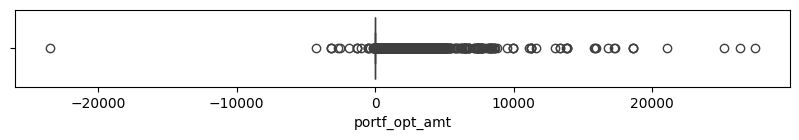

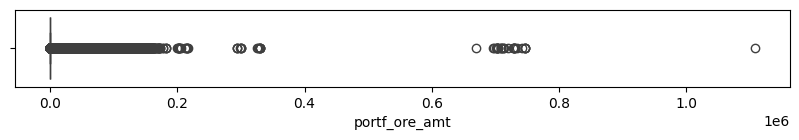

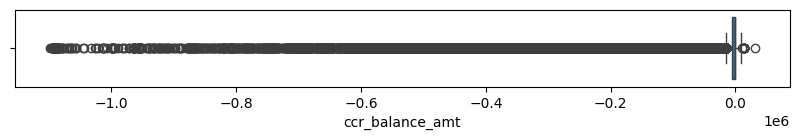

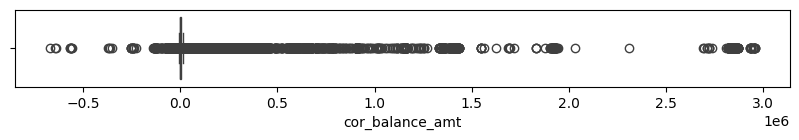

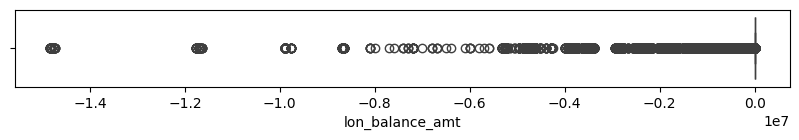

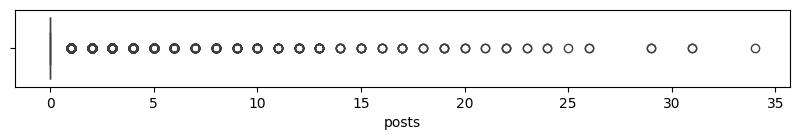

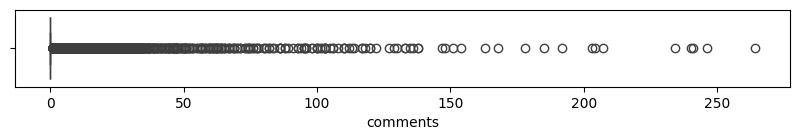

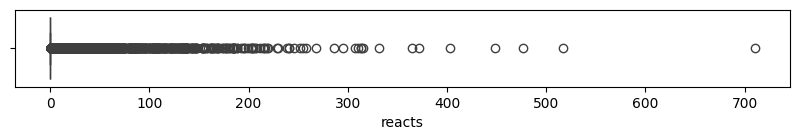

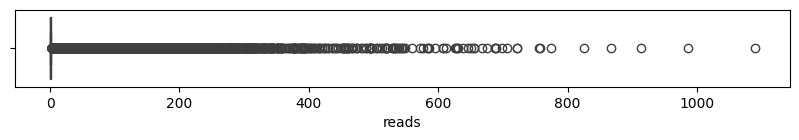

In [13]:
for i in df_float64.columns:
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=df_float64[i], orient="h")
    plt.show()

Построив боксплоты, мы можем наблюдать потенциальные выбросы по количественным переменными. Используем IQR, чтоб понять, сколько по каждой переменной существуют потенциальных выбросов.

In [14]:
numeric_cols = df.select_dtypes(include=["int", "float"]).columns
out = pd.DataFrame()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    out[f"{col}_outlier"] = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
out.sum()

id_outlier                               0
age_outlier                           4840
children_cnt_outlier                 19027
monthly_income_amt_outlier           26567
forts_flg_outlier                        0
margin_status_flg_outlier                0
qualified_investor_flg_outlier           0
in_payment_rub_amt_outlier          102849
out_payment_rub_amt_outlier          26967
uncovered_position_amt_outlier       72274
turnover_rus_bon_amt_outlier         44771
turnover_rus_sec_amt_outlier         93966
turnover_forts_amt_outlier           11937
turnover_cur_amt_outlier             17415
turnover_etf_amt_outlier             66579
turnover_fnd_amt_outlier             61668
turnover_opt_amt_outlier              8912
turnover_ore_prc_amt_outlier          3556
turnover_ore_sel_amt_outlier          1106
turnover_tracking_amt_outlier        73968
trade_order_rus_sec_cnt_outlier      81289
trade_order_rus_bon_cnt_outlier      44771
trade_order_forts_cnt_outlier        11937
trade_order

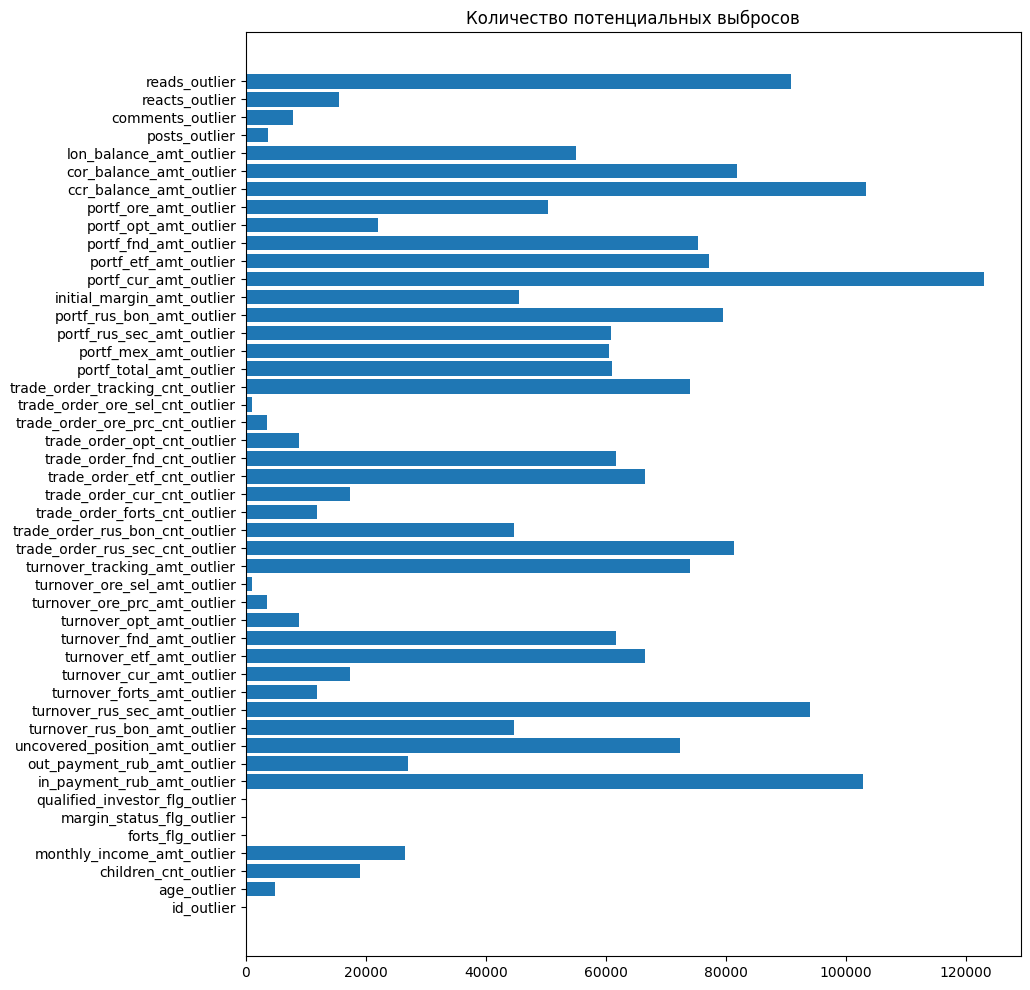

In [15]:
plt.figure(figsize = (10,12))
plt.barh(out.columns.tolist(), out.sum())
plt.title("Количество потенциальных выбросов")
plt.show()

### Корреляционный анализ

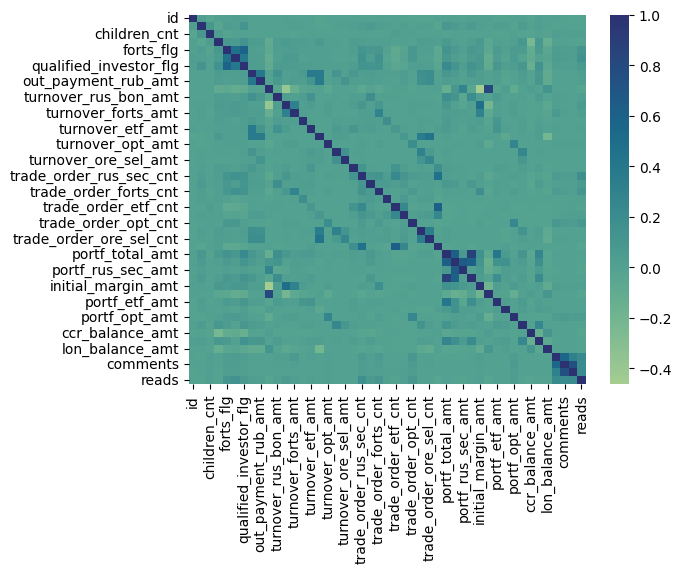

In [48]:
df_num = df.select_dtypes(include = ["float64", "int64"])
corr = df_num.corr()
sns.heatmap(corr, annot=None, cmap = "crest")
plt.show()

In [64]:
corr

,id,age,children_cnt,monthly_income_amt,forts_flg,margin_status_flg,qualified_investor_flg,in_payment_rub_amt,out_payment_rub_amt,uncovered_position_amt,...,portf_fnd_amt,portf_opt_amt,portf_ore_amt,ccr_balance_amt,cor_balance_amt,lon_balance_amt,posts,comments,reacts,reads
id,1.000000,0.024070,-0.034063,0.007544,0.007647,0.023786,0.017196,-0.002349,-0.003470,0.001850,...,-0.008523,0.000807,0.010507,-0.015499,0.018665,0.004245,2.241323e-05,-0.000803,-0.011219,-0.010967
age,0.024070,1.000000,0.100081,-0.028643,0.044025,0.020782,0.124683,0.004982,0.002002,-0.000419,...,0.014053,-0.012519,0.045957,-0.005524,0.022821,-0.004670,-1.215772e-02,-0.002672,0.003653,-0.007983
children_cnt,-0.034063,0.100081,1.000000,0.037585,-0.020934,-0.005767,-0.002380,-0.003320,-0.003231,0.001189,...,-0.002345,0.007300,-0.013079,-0.019553,-0.003136,-0.014093,1.574839e-02,0.008147,0.015438,0.012501
monthly_income_amt,0.007544,-0.028643,0.037585,1.000000,0.087673,0.062125,0.139949,0.048844,0.038189,-0.094660,...,-0.000852,0.011291,0.089382,-0.227399,0.090736,-0.129844,-3.862253e-03,-0.004711,-0.006466,-0.016173
forts_flg,0.007647,0.044025,-0.020934,0.087673,1.000000,0.454951,0.597540,0.026749,0.020364,-0.066532,...,0.009864,0.053166,0.050441,-0.108296,0.071023,-0.046443,3.563098e-02,0.029950,0.024823,0.103736
margin_status_flg,0.023786,0.020782,-0.005767,0.062125,0.454951,1.000000,0.401970,0.025458,0.023809,-0.114145,...,-0.016006,0.060770,-0.006759,-0.096920,0.003974,-0.033586,5.026633e-02,0.041973,0.032230,0.141800
qualified_investor_flg,0.017196,0.124683,-0.002380,0.139949,0.597540,0.401970,1.000000,0.039299,0.028676,-0.094994,...,0.028294,0.037069,0.098677,-0.142155,0.138565,-0.062361,3.320547e-02,0.019378,0.011447,0.072905
in_payment_rub_amt,-0.002349,0.004982,-0.003320,0.048844,0.026749,0.025458,0.039299,1.000000,0.402286,-0.005898,...,-0.021164,0.001139,0.045482,-0.011709,0.085989,-0.093997,3.476139e-03,0.000773,-0.000068,0.025223
out_payment_rub_amt,-0.003470,0.002002,-0.003231,0.038189,0.020364,0.023809,0.028676,0.402286,1.000000,-0.008492,...,-0.028432,0.001619,0.023342,-0.008355,0.097417,-0.088759,3.834965e-03,0.001459,0.000016,0.021825
uncovered_position_amt,0.001850,-0.000419,0.001189,-0.094660,-0.066532,-0.114145,-0.094994,-0.005898,-0.008492,1.000000,...,0.027886,-0.088083,0.001642,0.029733,0.003925,0.108723,-3.267626e-03,-0.001685,-0.001001,-0.033313


In [65]:
df['portf_total_amt'].sum()

27709230528.0

In [66]:
27709230528/1800000000000

0.01539401696